In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("cereal (1).csv")


In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


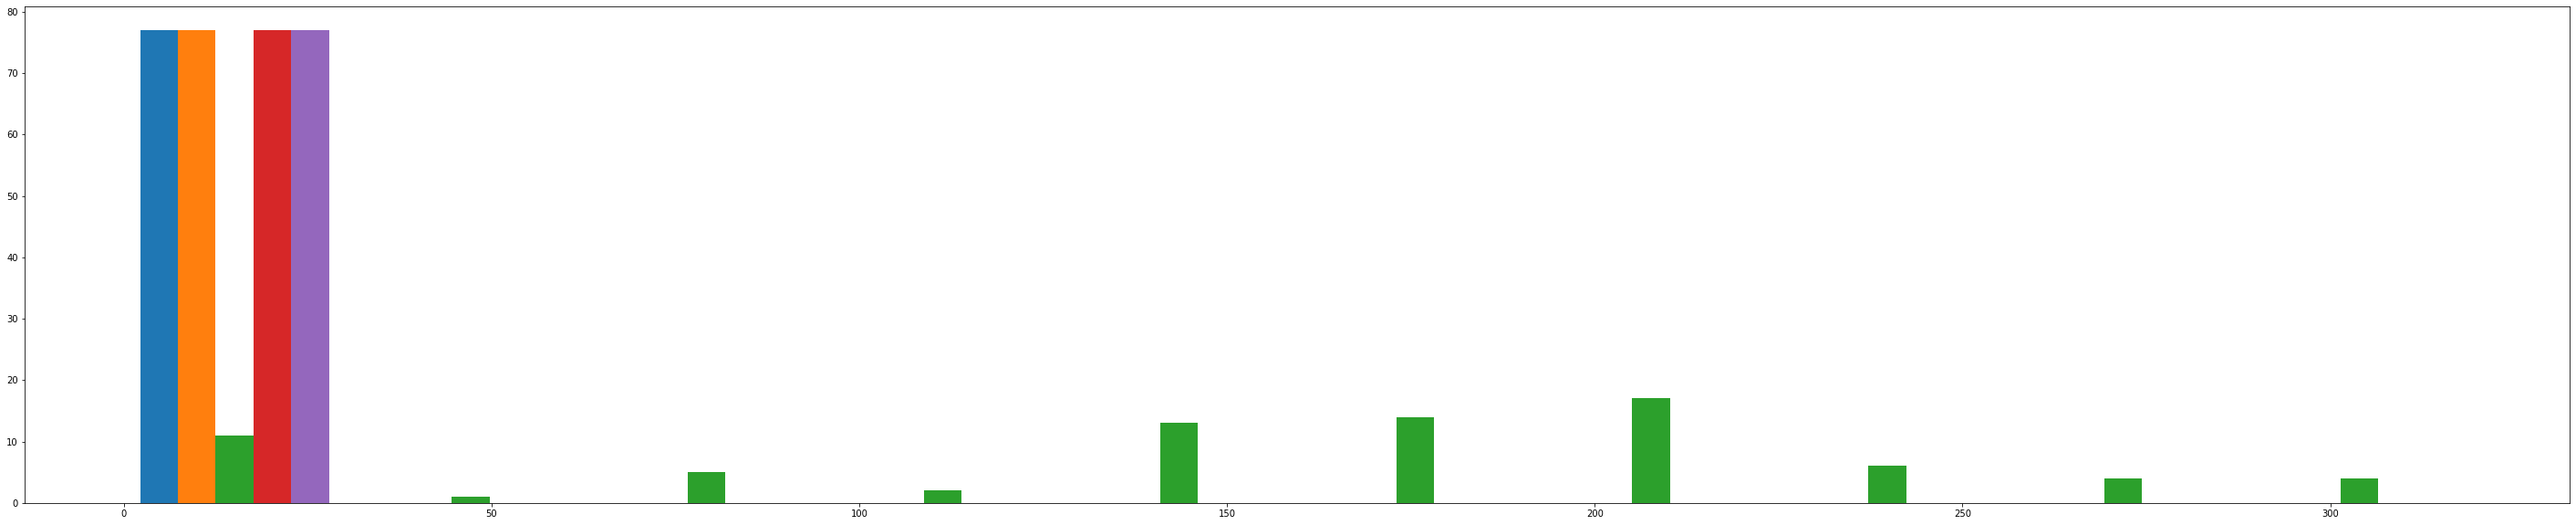

In [ ]:
fig,ax=plt.subplots(figsize=(50,10))
ax.hist([df['protein'],df['fat'],df['sodium'],df['fiber'],df['carbo']])
plt.show()

In [ ]:
df['mfr']=df['mfr'].str.replace('N','Nabisco')
df['mfr']=df['mfr'].str.replace('Q','Quaker Oats')
df['mfr']=df['mfr'].str.replace('K','Kelloges')
df['mfr']=df['mfr'].str.replace('R','Raslston purina')
df['mfr']=df['mfr'].str.replace('G','General Mills')
df['mfr']=df['mfr'].str.replace('P','Post')
df['mfr']=df['mfr'].str.replace('A','American Home Foods Products')

In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloges,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloges,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Raslston Posturina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


<AxesSubplot:xlabel='count', ylabel='mfr'>

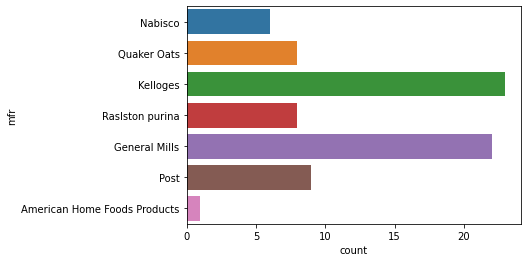

In [ ]:
import seaborn as sns
sns.countplot(y='mfr',data=df)

In [ ]:
X=df.iloc[:,3:15]
y=df.iloc[:,15]

In [ ]:
print(y)

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     34.384843
        ...    
72    39.106174
73    27.753301
74    49.787445
75    51.592193
76    36.187559
Name: rating, Length: 77, dtype: float64


In [ ]:
print(df.iloc[:,3:15])

    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0         70        4    1     130   10.0    5.0       6     280        25   
1        120        3    5      15    2.0    8.0       8     135         0   
2         70        4    1     260    9.0    7.0       5     320        25   
3         50        4    0     140   14.0    8.0       0     330        25   
4        110        2    2     200    1.0   14.0       8      -1        25   
..       ...      ...  ...     ...    ...    ...     ...     ...       ...   
72       110        2    1     250    0.0   21.0       3      60        25   
73       110        1    1     140    0.0   13.0      12      25        25   
74       100        3    1     230    3.0   17.0       3     115        25   
75       100        3    1     200    3.0   17.0       3     110        25   
76       110        2    1     200    1.0   16.0       8      60        25   

    shelf  weight  cups  
0       3     1.0  0.33  
1       3  

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57, 12)
(20, 12)
(57,)
(20,)


In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=linear_model.predict(X_test)

In [ ]:
print(y_pred)

[23.80404307 54.85091735 58.3451415  49.78744513 39.2591974  39.70339969
 41.99893311 30.4508435  31.07221737 50.82839235 18.04285079 41.50354004
 45.81171587 59.42550468 46.65884431 40.91704687 30.31335109 41.44501952
 34.13976432 40.44877233]


In [ ]:
print(linear_model.coef_)

[-2.22724164e-01  3.27317385e+00 -1.69140803e+00 -5.44927025e-02
  3.44347975e+00  1.09245093e+00 -7.24895160e-01 -3.39933505e-02
 -5.12119681e-02 -7.46423484e-08  3.08867736e-07  1.10386641e-07]


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [ ]:
print("Mean squared error",mse)

Mean squared error 1.145226470213673e-13


In [ ]:
import math
rmse=math.sqrt(mse)

In [ ]:
print("Root mean squareed error:",rmse)

Root mean squareed error: 3.38411948697689e-07


In [ ]:
df=pd.read_csv('FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<AxesSubplot:>

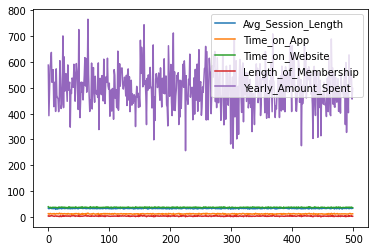

In [ ]:
df.plot()

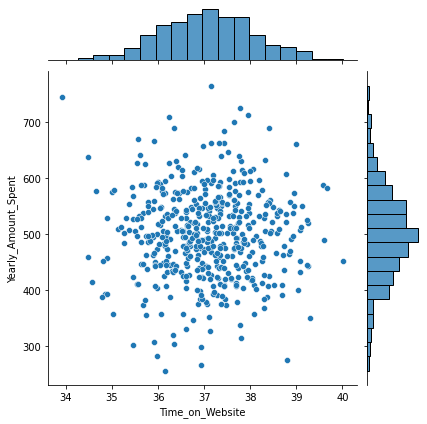

In [ ]:
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',kind='scatter',data=df)

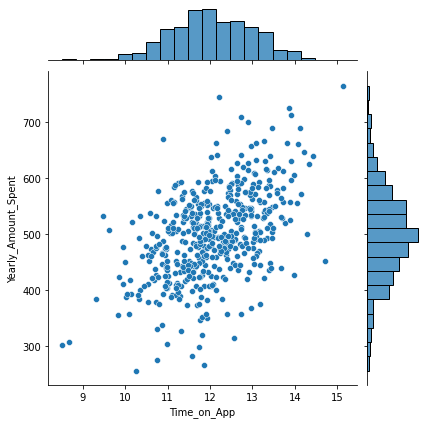

In [ ]:
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',kind='scatter',data=df)

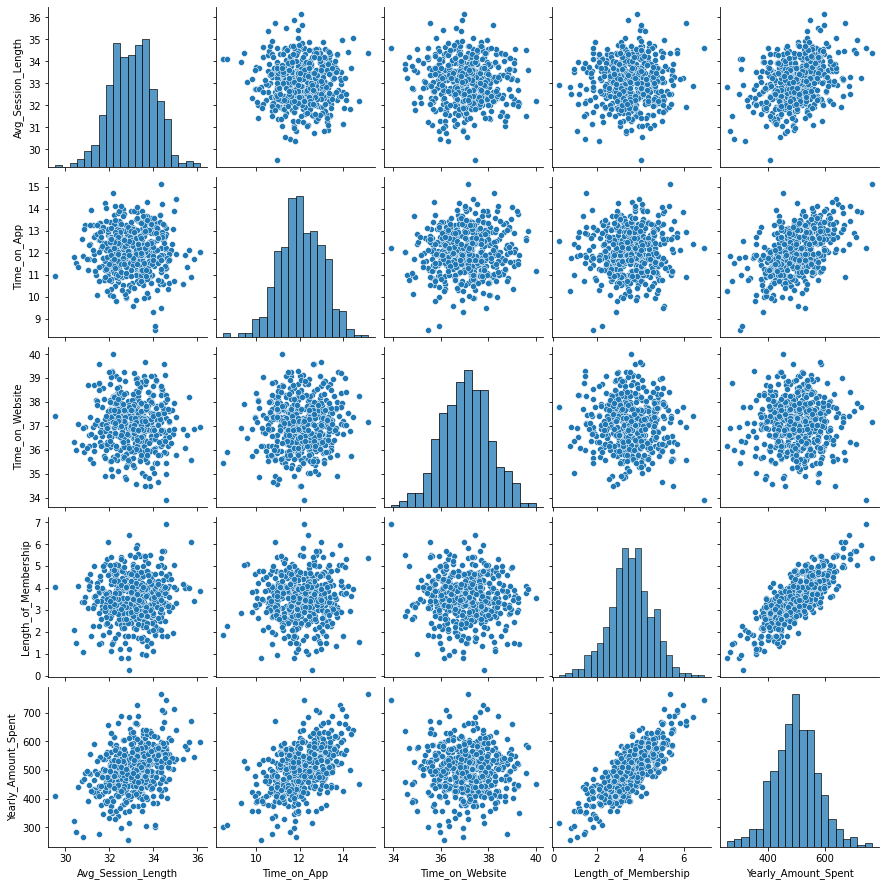

In [ ]:
sns.pairplot(df)

In [ ]:
X=df.iloc[:,6]
y=df.iloc[:,7]

In [ ]:
print(x)

0      4.082621
1      2.664034
2      4.104543
3      3.120179
4      4.446308
         ...   
495    3.746573
496    3.576526
497    4.958264
498    2.336485
499    2.735160
Name: Length_of_Membership, Length: 500, dtype: float64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=85)

In [ ]:
linmodel=LinearRegression()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375,)
(125,)
(375,)
(125,)
